In [130]:
import numpy as np 
import scipy.io as sio
from scipy import signal 
import matplotlib.pyplot as plt
%matplotlib inline 


Task 1c) 
**Plotting energy density spectrum and correlation** 

In [85]:
n = np.arange(50)
l = np.arange(-50, 50, 1)
f = np.linspace(-0.5, 0.5, 50)

a = [0.5, 0.9, -0.9]

def get_functions_for_a_val(this_a):
    x_n = [pow(this_a, n_val) for n_val in n]

    # 1 / 1 + a^2 - 2*a*cos(f)
    s_xx = 1 / (1 + pow(this_a, 2) - 2 * this_a * np.cos(2*np.pi*f))
    
    # a^l / 1 - a^2 
    r_xx = [(pow(this_a, l_val) / 1 - this_a ** 2) for l_val in l]
    return x_n, s_xx, r_xx




In [173]:
def plot_discrete_func(x_n, n, a, x_label:str = None, y_label:str = None):
    x_label = x_label if x_label else 'n'
    y_label = y_label if y_label else 'x[n]'
    plt.xlabel(x_label)
    # plt.xlim(min(n), max(n))
    plt.ylabel(y_label)
    plt.title(r'Plot of {} for a = {}'.format(y_label, a))
    plt.stem(n, x_n)
    plt.show()

def plot_cont_func(f_x, x, a:str = '', x_label:str = None, y_label:str = None): 
    x_label = x_label if x_label else 'f'
    y_label = y_label if y_label else 'X(f)'
    plt.xlabel(x_label) 
    plt.ylabel(y_label) 
    plt.title(r'Plot of {} for a = {}'.format(y_label, a))
    plt.plot(x, f_x)
    plt.show()



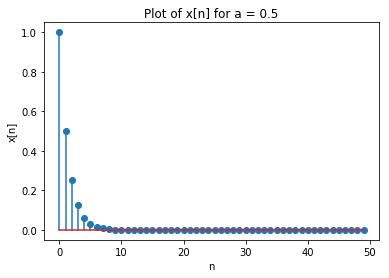

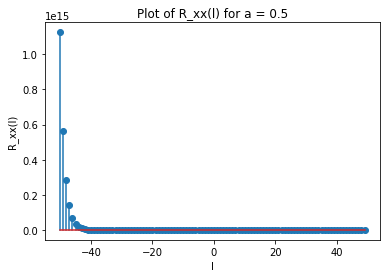

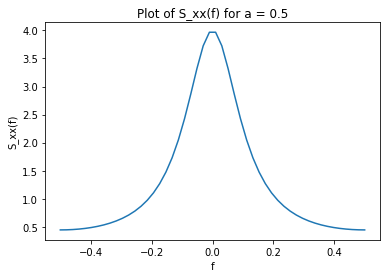

In [139]:
a = 0.5
x_n, s_xx, r_xx = get_functions_for_a_val(a)
plot_discrete_func(x_n, n, a)
plot_discrete_func(r_xx, l, a, 'l', 'R_xx(l)')
plot_cont_func(s_xx, f, a, 'f', 'S_xx(f)')


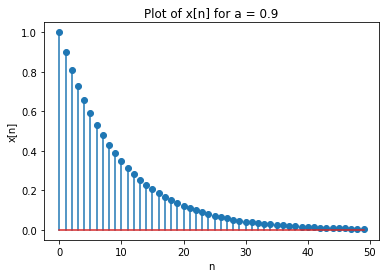

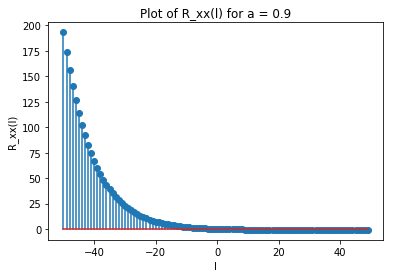

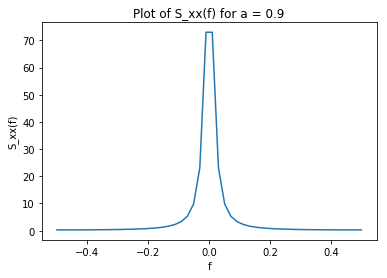

In [141]:
a = 0.9
x_n, s_xx, r_xx = get_functions_for_a_val(a)
plot_discrete_func(x_n, n, a)
plot_discrete_func(r_xx, l, a, 'l', 'R_xx(l)')
plot_cont_func(s_xx, f, a, 'f', 'S_xx(f)')

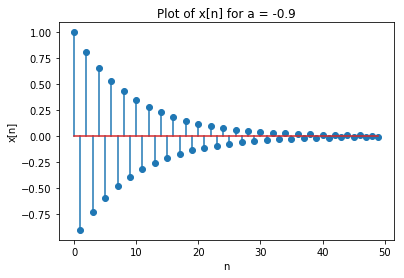

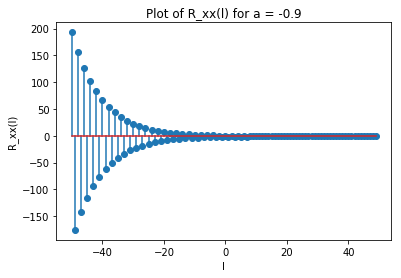

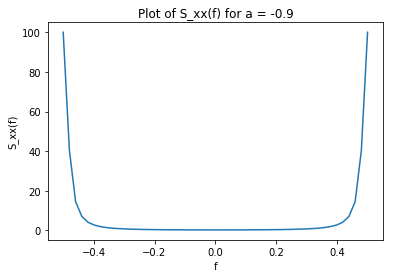

In [142]:
a = -0.9
x_n, s_xx, r_xx = get_functions_for_a_val(a)
plot_discrete_func(x_n, n, a)
plot_discrete_func(r_xx, l, a, 'l', 'R_xx(l)')
plot_cont_func(s_xx, f, a, 'f', 'S_xx(f)')

We let the reader make their observations from the plots.

# Problem 2 

2a) Plot x[n] and y[n]

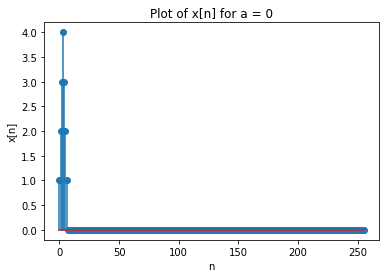

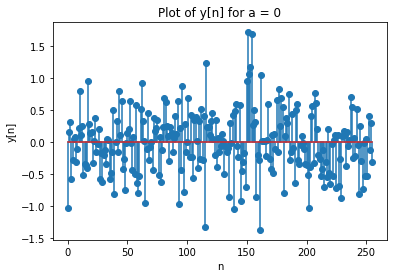

In [143]:
# reuse x[n] as before 
data = sio.loadmat('signals.mat')
x, y = data['x'][0], data['y'][0]

ns_for_x = np.arange(len(x))
ns_for_y = np.arange(len(y))

plot_discrete_func(x, ns_for_x, 0)
plot_discrete_func(y, ns_for_y, 0, 'n', 'y[n]')

We can see that x[n] has only been received for the first 6 time steps in n.
Thus, everything after n = 6 for y[n] would be noise(?)

2b) Find the crosscorrelation function $R_{xy}(l)$. We note that the range will now go from [-L + 1, L - 1]

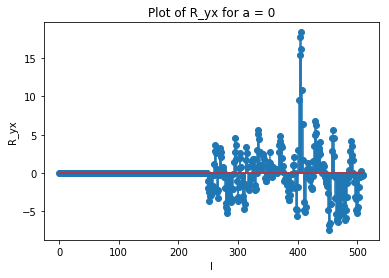

510

In [165]:
r_yx = signal.correlate(y, x)
# L = ( len(r_yx) - 1 ) // 2
# r_yx_ls = np.arange(-L - 1, L - 1, 1)
plot_discrete_func(r_yx, np.arange(len(r_yx)), 0, 'l', 'R_yx')
len(r_yx_ls)

2c) Get same result using convolution and flipping 

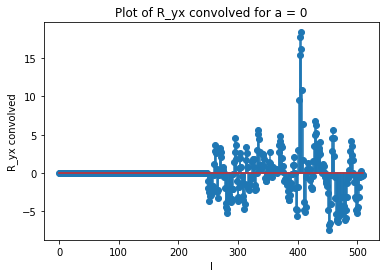

In [147]:
r_yx_np = np.convolve(y, np.flip(x))
plot_discrete_func(r_yx_np, np.arange(len(r_yx_np)), 0, 'l', 'R_yx convolved' )

2d) Has an object been hit? Determine delay D if so. 
We can see that from l < 250 approximately, there was only background noise w[n], which gives zero cross-correlaton. It is assumed therefore that an object hit the signal, causing all disturbances around l = 250. 
We estimate the delay to be around l = 400, as this is the point where the two functions has highest cross-correlation of emitted and received signal. 
Please note we have just used the total length to plot here, so the point would need to be down-scaled with the "negative axis" at lenght 250. **Thus the peak should be around l=150**

In [151]:
d = np.argmax(r_yx_np)
print( 'Object hit at delay d = {}'.format(d))

Object hit at delay d = 405


**Problem 3**

3c) Implement filter and plot unit sample response and frequency response.
**This failed** please rather see the matlab file attached. 

TransferFunctionContinuous(
array([1., 5.]),
array([1.]),
dt: None
)


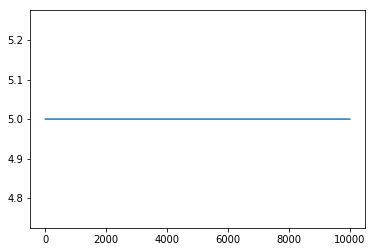

In [227]:
alpha = 0.5
R = 4  # s 
w_spectrum = np.logspace(0, 50, 500)
num = [1, R+1]
den = [1]

# transfer_func = signal.TransferFunction(num, den)
zeros_poles = signal.ZerosPolesGain(num, den, alpha)
# Initialize filter with tranfer function 
filt = signal.lti(num, den)
w, H = signal.freqresp(filt)

plt.figure()
plt.plot(w, np.abs(H.real, H.imag))

# imp_response = filt.impulse()
# plot_cont_func(imp_response[0], imp_response[1])
# plot_cont_func(freq_resp[0], freq_resp[1])
print(filt)
